# Data Analysis with Pandas and Matplotlib
This notebook demonstrates how to load, analyze, and visualize a dataset using **pandas** and **matplotlib**.
We will use the classic **Iris dataset**.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Loading and Exploring the Dataset

In [2]:
try:
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame
    print('Dataset loaded successfully.')
except Exception as e:
    print(f'Error loading dataset: {e}')

df.head()

Dataset loaded successfully.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
df = df.dropna()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Basic Data Analysis

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
grouped_means = df.groupby('target').mean()
grouped_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [8]:
df['sepal_petal_ratio'] = df['sepal length (cm)'] / df['petal length (cm)']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_petal_ratio
0,5.1,3.5,1.4,0.2,0,3.642857
1,4.9,3.0,1.4,0.2,0,3.500000
2,4.7,3.2,1.3,0.2,0,3.615385
3,4.6,3.1,1.5,0.2,0,3.066667
4,5.0,3.6,1.4,0.2,0,3.571429


## Data Visualizations

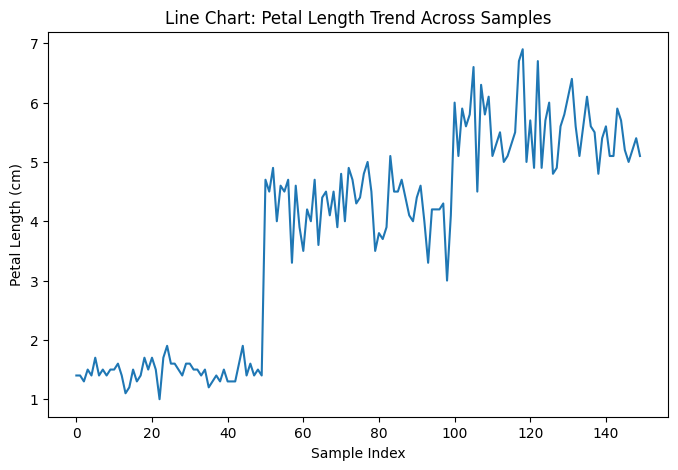

In [9]:
plt.figure(figsize=(8,5))
df['petal length (cm)'].plot()
plt.title('Line Chart: Petal Length Trend Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.show()

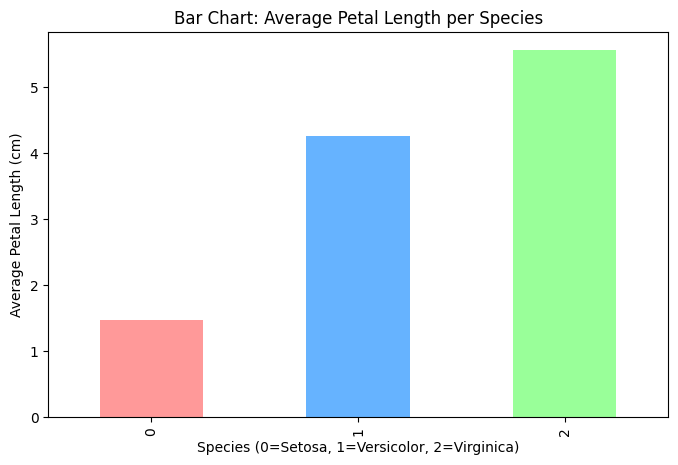

In [10]:
species_avg = df.groupby('target')['petal length (cm)'].mean()
species_avg.plot(kind='bar', figsize=(8,5), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Bar Chart: Average Petal Length per Species')
plt.xlabel('Species (0=Setosa, 1=Versicolor, 2=Virginica)')
plt.ylabel('Average Petal Length (cm)')
plt.show()

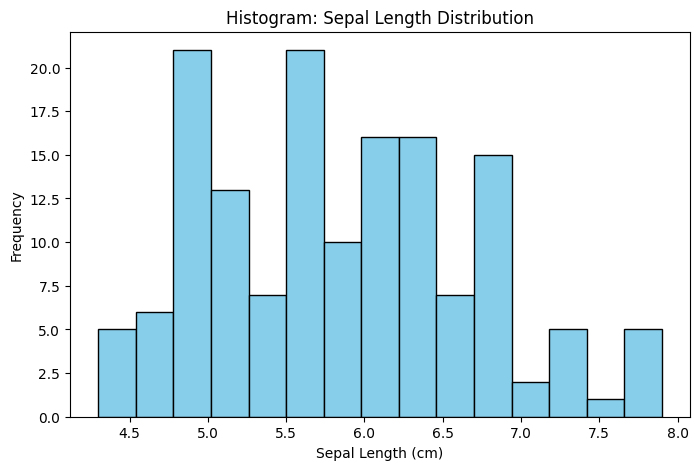

In [11]:
df['sepal length (cm)'].plot(
    kind='hist', bins=15, color='skyblue', edgecolor='black', figsize=(8,5),
    title='Histogram: Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

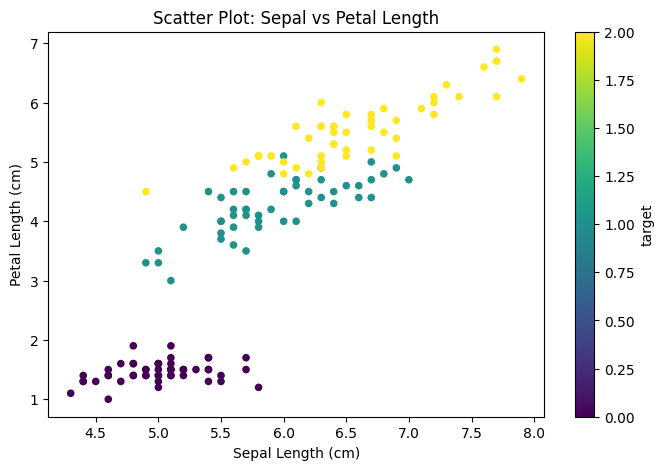

In [12]:
df.plot.scatter(
    x='sepal length (cm)', y='petal length (cm)', c='target',
    colormap='viridis', figsize=(8,5), title='Scatter Plot: Sepal vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()